# Linear Regression From Nothing

This notebook explains how to build, train, and evaluate a linear regressor in Python. It covers background and implementation to provide an understanding of beginner machine learning concepts.


## Background: What is Linear Regression

**Linear Regression** is one of the simplest statistical models. It demonstrates the relationship between the independent variable $x$, or the input features, and the dependent variable $y$, or the target, as a linear equation:

$$
y = b + w \cdot x + e
$$

- $b$: bias or intercept  
- $w$: weights or slope (coefficient)  
- $e$: random error  

The goal is to find the line of best fit, which minimizes the **Mean squared error**, or MSE:

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2
$$

## Step 1: Data Generation

Before we can train a regression model, we need data. The following code snippet defines a function `generate_data` that creates a synthetic dataset, fake but realistic data that we can use. The function takes two inputs:
* `samples` - the number of data points or rows
* `features` - the number of input variables or columns

The function starts by randomly generating a feature matrix, $X$, based on `samples` and `features`. Then it randomly creates a set of *weights* and *bias*. The function uses the weights and bias to compute the target using a linear equation:

$$
y=X \cdot weights+bias+noise
$$

Noise is added to simulate real word imperfections often found in data and make it so the data isn't perfectly linear. Finally, the function returns the generated features and target for use in training our model.

In [1]:
import numpy as np # import NumPy library for linear algebra

def generate_data(samples = 1000, features = 3):                  # define data generation function with input for samples and features
    X = np.random.randn(samples, features)                        # generate randomized features
    weights = np.arange(1, features + 1).reshape(-1, 1)           # set random weights for target
    bias = np.random.randn()                                      # set a random bias for target
    y = X.dot(weights) + bias + 0.5 * np.random.randn(samples, 1) # generate target with linear equation
    return X, y                                                   # return features and target

X, y = generate_data() # generate a dataset with 1000 samples and 3 features

print('X shape:', X.shape) # print the shape of the features
print('y shape:', y.shape) # print the shape of the target

X shape: (1000, 3)
y shape: (1000, 1)


## Step 2: Core Components

Now that we have a dataset, we can start building the core functions that make up the model. These functions include parameter initialization, predictions, and loss measurement.

**1. Initialize Parameters**
The first function defined is called `initialize_parameters`, and has input for `features`. This function sets up the initial weights and bias for the model. The function starts by initializing `weights` by creating a NumPy array of zeros, one weight for each feature. Next, the function sets `bias` to zero as well. Finally, the function returns the initialized model parameters. The parameters created by this function will be updated during training to improve our models accuracy and are initially set to zero to give it a neutral starting point.

In [2]:
def initialize_parameters(features):
    weights = np.zeros((features, 1)) # initialize weights as zeros
    bias = 0.0                        # initializ bias as zero
    return weights, bias              # return weights and bias

**2. Predict**
The second function is known as `predict`. `Predict` has input for:
* `X` - the features
* `weights` - the models current weights
* `bias` - the models current bias

The function uses these inputs to generate a prediction of the target value based on the features, weights, and bias using the linear equation:

$$
\hat{y} = X \cdot \text{weights} + \text{bias}
$$

Finally, the function returns the predicted output for the input features. This function is used during training to give us predictions for every sample in the dataset based on the current weights and bias. It is also used to make predictions on other data after the model is fully trained.

In [3]:
# predicts based on weights and bias using a linear model
def predict(X, weights, bias):
    return X.dot(weights) + bias    # return prediction

**3. Compute Loss**
The third and final function below is the `compute_loss` function. It takes the following input:

* `prediction` - the predicted value
* `actual` - the actual value

The function then uses these inputs to calculate the loss, or how far off the predictions are from the actual values. It uses **Mean Squared Error** as its loss function:

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2
$$

The loss returned by this function is used to tell us how our model is performing. A lower loss means the predictions are getting closer to the actual value, so ideally the loss would improve after each epoch.

In [4]:
# computes the mean squared error between the predicted value and the actual value
def compute_loss(prediction, actual):
    return np.mean((prediction - actual)**2)    # return loss

## Step 3: Model Training

Now that we have our helper functions set up, we can start training our model using a method known as gradient descent. Gradient descent is an optimization algorithm that helps the model improve predictions by adjusting weights and bias to minimize loss. We train the model by defining the `train` function with the following inputs:

* `X` - the features
* `y` - the target
* `learning_rate` - a constant that controls the size of the update step
* `epochs` - the number of training iterations

The training function starts by extracting the samples and features from the shape of the input data and initializing the weights and bias. It also creates a list to store a history of losses. Next the function performs each epoch, or iteration. Each epoch has three main steps:

**1. Forward Pass**

The forward pass starts by predicting the output using the current weights and bias, then calculating the loss. 

**2. Backpropagation**

Backpropagation calculates the derivatives of the weights and bias to determine how the weights and bias should change to minimize loss.

**3. Updates**

The weights and bias are updated using their derivatives multiplied by the learning rate

In addition to this, for every tenth of the total epoch, the loss is printed to keep track of the progress. Finally, the function returns the updated weights, updated bias, and the loss history.

In [5]:
def train(X, y, learning_rate=0.1, epochs=20):
    samples, features = X.shape                     # get number of samples and features from input shape
    weights, bias = initialize_parameters(features) # initalize weights and bias
    loss_history = []                               # a list to keep track of loss values

    # iterate for each epoch
    for epoch in range(epochs):
        # forward pass
        y_prediction = predict(X, weights, bias) # predict output with current weights and bias
        loss = compute_loss(y_prediction, y)     # compute loss with prediction and actual
        loss_history.append(loss)                # store loss

        # backpropagation
        derivative_weights = (2 / samples) * X.T.dot(y_prediction - y) # change in loss based on weights
        derivative_bias = (2 / samples) * np.sum(y_prediction - y)     # change in loss based on bias

        # update weights and bias
        weights -= learning_rate * derivative_weights 
        bias -= learning_rate * derivative_bias

        # print loss for every tenth of total epochs
        if epoch % (epochs // 10) == 0:
            print(f"Epoch {epoch}, Loss: {loss:.4f}")


    return weights, bias, loss_history  # return updated weights, updated bias, and loss history

# Train model
learned_weights, learned_bias, loss_history = train(X, y)

# print results from training
print("-" * 30)
print("Learned weights:", learned_weights.ravel())
print("Learned bias:", learned_bias)

Epoch 0, Loss: 13.6321
Epoch 2, Loss: 5.9305
Epoch 4, Loss: 2.6617
Epoch 6, Loss: 1.2720
Epoch 8, Loss: 0.6801
Epoch 10, Loss: 0.4276
Epoch 12, Loss: 0.3198
Epoch 14, Loss: 0.2736
Epoch 16, Loss: 0.2538
Epoch 18, Loss: 0.2453
------------------------------
Learned weights: [0.99118222 1.94900782 2.95702659]
Learned bias: -0.07821515477164684


## Step 4: Loss Visualization

We can see how the regressor performed during training by plotting **MSE** vs **Epoch**. We can do this because we stored losses for each epoch into `loss_history`. The code below creates a chart with the loss data plotted:

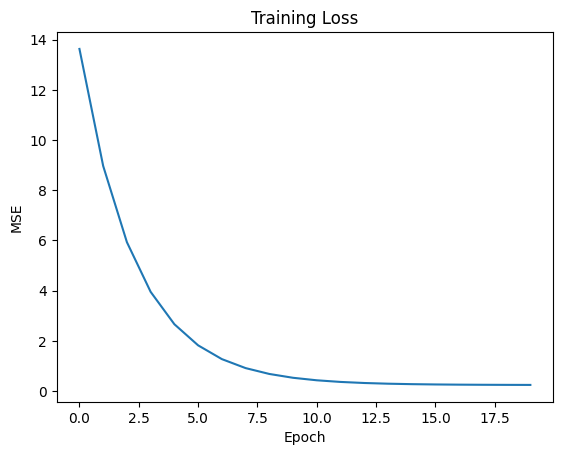

In [6]:
import matplotlib.pyplot as plt # import for graphing

plt.plot(loss_history)     # plot loss history
plt.xlabel("Epoch")        # label the X axis
plt.ylabel("MSE")          # label the Y axis
plt.title("Training Loss") # Add a title to the chart
plt.show()                 # display the chart

## Step 5: Prediction Visualization

We can visualize predictions by plotting the values predicted by our model, which are stored in `predictions` against the actual values. The code below makes a **Prediction** vs **Actual** chart, and prints the predicted line of best fit:

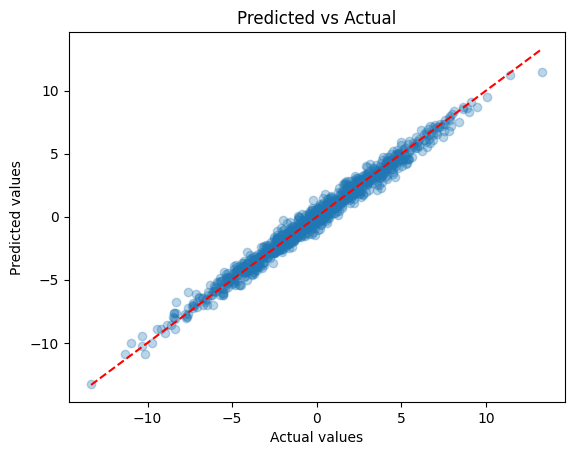

Line of best fit: y = 0.9912 * x + -0.0782


In [7]:
predictions = predict(X, learned_weights, learned_bias) # predict y values

plt.scatter(y, predictions, alpha=0.3)                  # plot predictions vs actual, make points translucent
plt.xlabel("Actual values")                             # label the graphs x axis
plt.ylabel("Predicted values")                          # label the graphs y axis
plt.title("Predicted vs Actual")                        # add a title to the graph
plt.plot([y.min(), y.max()], [y.min(), y.max()], "r--") # plot a y=x line for refrence
plt.show()

print(f"Line of best fit: y = {learned_weights[0,0]:.4f} * x + {learned_bias:.4f}") # calculate and print the line of best fit

## Author and Liscense

This notebook was authored by Aiden Flynn and is available under the [Apache 2.0](https://www.apache.org/licenses/LICENSE-2.0.txt) Liscense.

[Kaggle](https://www.kaggle.com/flynn28) | [Github](https://github.com/flynn-28/)